In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import X
from random import seed
from random import randrange

In [ ]:
#Load Data
data= pd.read_csv('/content/gdrive/MyDrive/ECSE 551/MP1/White_wine Quality.csv')

df = pd.DataFrame(data)

In [ ]:
# Define the header labels for the predictor variables
header_labels = ["Alcohol", "Malic acid", "Ash", "Alkalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Hue","Class Labels"]
# Add the header labels to the DataFrame
df.columns = header_labels
# # Display the DataFrame
print(df)

      Alcohol  Malic acid   Ash  Alkalinity of ash  Magnesium  Total phenols  \
0     0.19469     0.34932  0.07           0.082192   0.128550       0.140850   
1     0.30088     0.20548  0.17           0.075342   0.101840       0.070423   
2     0.30088     0.20548  0.17           0.075342   0.101840       0.070423   
3     0.24779     0.34247  0.05           0.068493   0.093489       0.323940   
4     0.25664     0.27397  0.42           0.095890   0.125210       0.098592   
...       ...         ...   ...                ...        ...            ...   
1593  0.19469     0.32192  0.10           0.054795   0.085142       0.464790   
1594  0.18584     0.63014  0.08           0.095890   0.091820       0.253520   
1595  0.23894     0.58904  0.05           0.082192   0.081803       0.267610   
1596  0.47788     0.39041  0.11           0.034247   0.120200       0.098592   
1597  0.18584     0.39726  0.08           0.195210   0.091820       0.098592   

      Flavanoids  Nonflavanoid phenols 

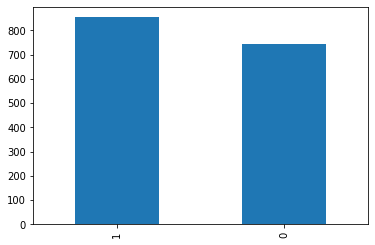

In [ ]:
###################Step 1: Data Distribution#################
#Class Distribution
class_labels = df["Class Labels"]
class_label_counts = class_labels.value_counts()
class_label_counts.plot(kind="bar")

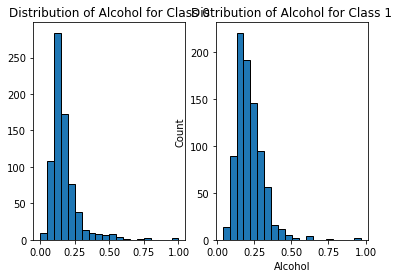

In [ ]:
# Filter the DataFrame to only include rows with Class Labels 1 or 0
#Class 1 = Good
#Class 0 Bad
class_0 = df[df['Class Labels'] == 0]
class_1 = df[df['Class Labels'] == 1]
# Plot the distribution of the "Alcohol" column for the class 1
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot data1 in first subplot
ax1.hist(class_0['Hue'], bins=20, edgecolor='k')
ax1.set_title('Distribution of Alcohol for Class 0')
plt.xlabel('Alcohol')
plt.ylabel('Count')


# Plot data2 in second subplot
ax2.hist(class_1['Hue'], bins=20, edgecolor='k')
ax2.set_title('Distribution of Alcohol for Class 1')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

This section is spliting the data. The line x = dataset[:, 0:5] is selection the features. If you want to use a specific column of feature and remove the rest of them to change the accuracy just you need to change the number this line:

***Note that default setting is using all 10 features***

x = dataset[:, 0:10]

In [ ]:
# from sklearn.utils import shuffle
# #Shuffle the dataset
# dataset = shuffle(np.array(data))
# #Save the shuffled dataset to a new file
# np.savetxt('/content/gdrive/MyDrive/ECSE 551/MP1/White_wine Quality_shuffled.csv', dataset, delimiter=',')

In [ ]:
#Split Data
dataset = np.loadtxt('/content/gdrive/MyDrive/ECSE 551/MP1/White_wine Quality_shuffled.csv', delimiter=',')
X = dataset[:, [0,1,2,3,4,5,6,7,8,9]]
y = dataset[:, 10]
# # Split the data into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * X.shape[0])
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

print(y.shape)
print("X_trian shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)
print(y)

(1598,)
X_trian shape (1278, 9)
X_test shape (320, 9)
y_train shape (1278,)
y_test shape (320,)
[1. 1. 1. ... 0. 1. 1.]


In [ ]:
from tqdm import tqdm
import numpy as np
import random


class LogisticRegression:
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def cost_function(self, y_train, y_predict):
        # using negative log-likelihood to calculate the cost entropy loss function
        cost = -np.mean(y_train*(np.log(y_predict)) - (1-y_train)*np.log(1-y_predict))
        return cost

    def gradient_descent(self, X_train, y_train, y_predict):
        m = X_train.shape[0]
        W_grad = (1/m)*np.dot(X_train.T, (y_predict - y_train))
        return W_grad

    def fit(self, X_train, y_train, alpha=0.01, k=50000):
        m, n = X_train.shape
        y_train = y_train.reshape(m,1)
        W_fit = np.zeros((n,1))
        loss_value = []

        for i in tqdm(range(k)):
            y_predict = self.sigmoid(np.dot(X_train, W_fit))
            w_grad = self.gradient_descent(X_train, y_train, y_predict)
            W_fit -= alpha*w_grad
        loss_fuc = self.cost_function(y_train, y_predict)
        loss_value.append(loss_fuc)
        return W_fit, loss_value

    def predict(self, X_test, W):
        y_pred = self.sigmoid(np.dot(X_test, W))
        predict_classes = []
        predict_classes = [1 if prediction > 0.5 else 0 for prediction in y_pred]
        return np.array(predict_classes)

    def accu_eval(self, y_pred, y_test):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy



    def cross_validation_split(self, X, y, folds):
        X_split = []
        y_split = []
        fold_size = int(len(X) / folds)
        for i in range(folds):
            fold_start = i * fold_size
            fold_end = fold_start + fold_size
            fold_X = X[fold_start:fold_end]
            fold_y = y[fold_start:fold_end]
            X_split.append(fold_X)
            y_split.append(fold_y)
            print(fold_X.shape, fold_y.shape)
        return np.array(X_split), np.array(y_split)

    def k_fold_cross_validation(self, X, y, k=10):
        folds = self.cross_validation_split(X, y, k)
        X_folds = folds[0]
        y_folds = folds[1]
        indices = np.arange(k)
        accuracy = 0

        # exclude index fold
        for index in range(k):
          #spliting data
          X_train = np.concatenate(X_folds[indices!= index])
          Y_train = np.concatenate(y_folds[indices!= index])   
          X_test = X_folds[index]
          Y_test = y_folds[index]
          #training
          W_fit,loss_value = self.fit(X_train, Y_train)
          print(f"Loss value for {index+1}-fold is : {loss_value}")
          #testing
          y_pred = self.predict(X_test, W_fit)
          #accuracy
          fold_accuracy= self.accu_eval(y_pred, Y_test)
          accuracy += fold_accuracy
          print(f"accuracy for {index+1}-fold is {fold_accuracy}")
        average_acc = accuracy / k
        print(average_acc)
        return W_fit





In [ ]:

logreg = LogisticRegression()
W_fit = logreg.k_fold_cross_validation(X_train, y_train)
print(W_fit)

y_predict = logreg.predict(X_test,W_fit)
acc = logreg.accu_eval(y_predict, y_test)
print(f"Accuracy is: {acc}")

(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)
(127, 9) (127,)


100%|██████████| 50000/50000 [00:06<00:00, 7941.29it/s]


Loss value for 1-fold is : [-0.007200636067589237]
accuracy for 1-fold is 0.6692913385826772


100%|██████████| 50000/50000 [00:05<00:00, 9809.60it/s] 


Loss value for 2-fold is : [-0.011416857859177633]
accuracy for 2-fold is 0.7952755905511811


100%|██████████| 50000/50000 [00:03<00:00, 12537.90it/s]


Loss value for 3-fold is : [-0.00782548634925087]
accuracy for 3-fold is 0.7086614173228346


100%|██████████| 50000/50000 [00:05<00:00, 9940.51it/s]


Loss value for 4-fold is : [-0.009049720537633518]
accuracy for 4-fold is 0.7559055118110236


100%|██████████| 50000/50000 [00:05<00:00, 8940.20it/s] 


Loss value for 5-fold is : [-0.008585660399867273]
accuracy for 5-fold is 0.6220472440944882


100%|██████████| 50000/50000 [00:04<00:00, 12313.97it/s]


Loss value for 6-fold is : [-0.004055652283543107]
accuracy for 6-fold is 0.7637795275590551


100%|██████████| 50000/50000 [00:04<00:00, 10811.39it/s]


Loss value for 7-fold is : [-0.010118126093446438]
accuracy for 7-fold is 0.7244094488188977


100%|██████████| 50000/50000 [00:06<00:00, 7747.20it/s] 


Loss value for 8-fold is : [-0.005413426481023809]
accuracy for 8-fold is 0.7795275590551181


100%|██████████| 50000/50000 [00:04<00:00, 12464.36it/s]


Loss value for 9-fold is : [-0.005594547403887235]
accuracy for 9-fold is 0.7401574803149606


100%|██████████| 50000/50000 [00:04<00:00, 12393.56it/s]

Loss value for 10-fold is : [-0.010301303032913817]
accuracy for 10-fold is 0.7086614173228346
0.7267716535433071
[[ 4.58787414]
 [-3.63675448]
 [ 2.61480523]
 [-2.85632809]
 [ 1.28532187]
 [-4.83664877]
 [-4.671045  ]
 [ 3.43678606]
 [ 4.94541626]]
Accuracy is: 0.78125
